In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt#

In [2]:
def get_batchsize(filename):
    ind = filename.find('_b')
    return int(filename[ind+2:ind+6])

In [3]:
def get_epoc(filename):
    ind = filename.find('_epoc')
    return int(filename[ind+5:ind+9])

In [4]:
def get_train_num(filename):
    ind = filename.find('_b')
    train_num = int(filename[ind-4:ind])
    return train_num

In [5]:
def get_steps(batchsize, epoc, train_num):
    return int(np.ceil(train_num*1.0/batchsize)*epoc)

In [11]:
test_list={}
train_list={}
f=open('../../log.txt')
temp = f.readline()
while len(temp)>0:
#for i in range(10):
    bsize = get_batchsize(temp)
    epoc = get_epoc(temp)
    train_num = get_train_num(temp)
    key = str(bsize)+'_'+str(train_num)
    steps = get_steps(bsize,epoc,train_num)
    temp = f.readline()
    test_error = float(temp)
    temp = f.readline()
    train_error = float(temp)
    temp = f.readline()
    if not test_list.has_key(key):
        test_list[key] = np.array([[steps, test_error]])
        train_list[key] = np.array([[steps, train_error]])
    else:
        test_list[key] = np.append(test_list[key], [[steps, test_error]], axis = 0)
        train_list[key] = np.append(train_list[key], [[steps, train_error]], axis = 0)
        
    
f.close()
#print test_list[key]

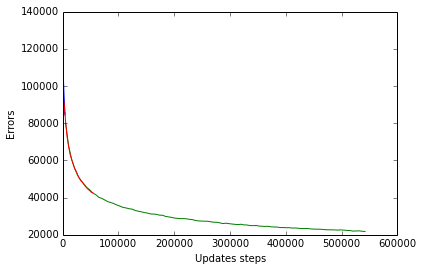

In [18]:
for key in test_list.keys():
    plt.plot(test_list[key][:,0],test_list[key][:,1])
plt.xlabel('Updates steps')
plt.ylabel('Errors')
#plt.xlim((0,10000))

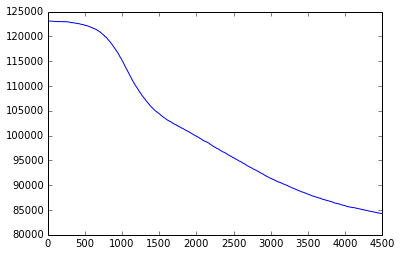

In [17]:
key = test_list.keys()[0]
plt.plot(test_list[key][:,0],test_list[key][:,1])